In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [4]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:

df = pd.read_csv('StudentPerformanceFactors.csv')
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [9]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:

df.dtypes


Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [13]:

df.shape


(6607, 20)

In [15]:

df.head(20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


In [17]:

df.describe()


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


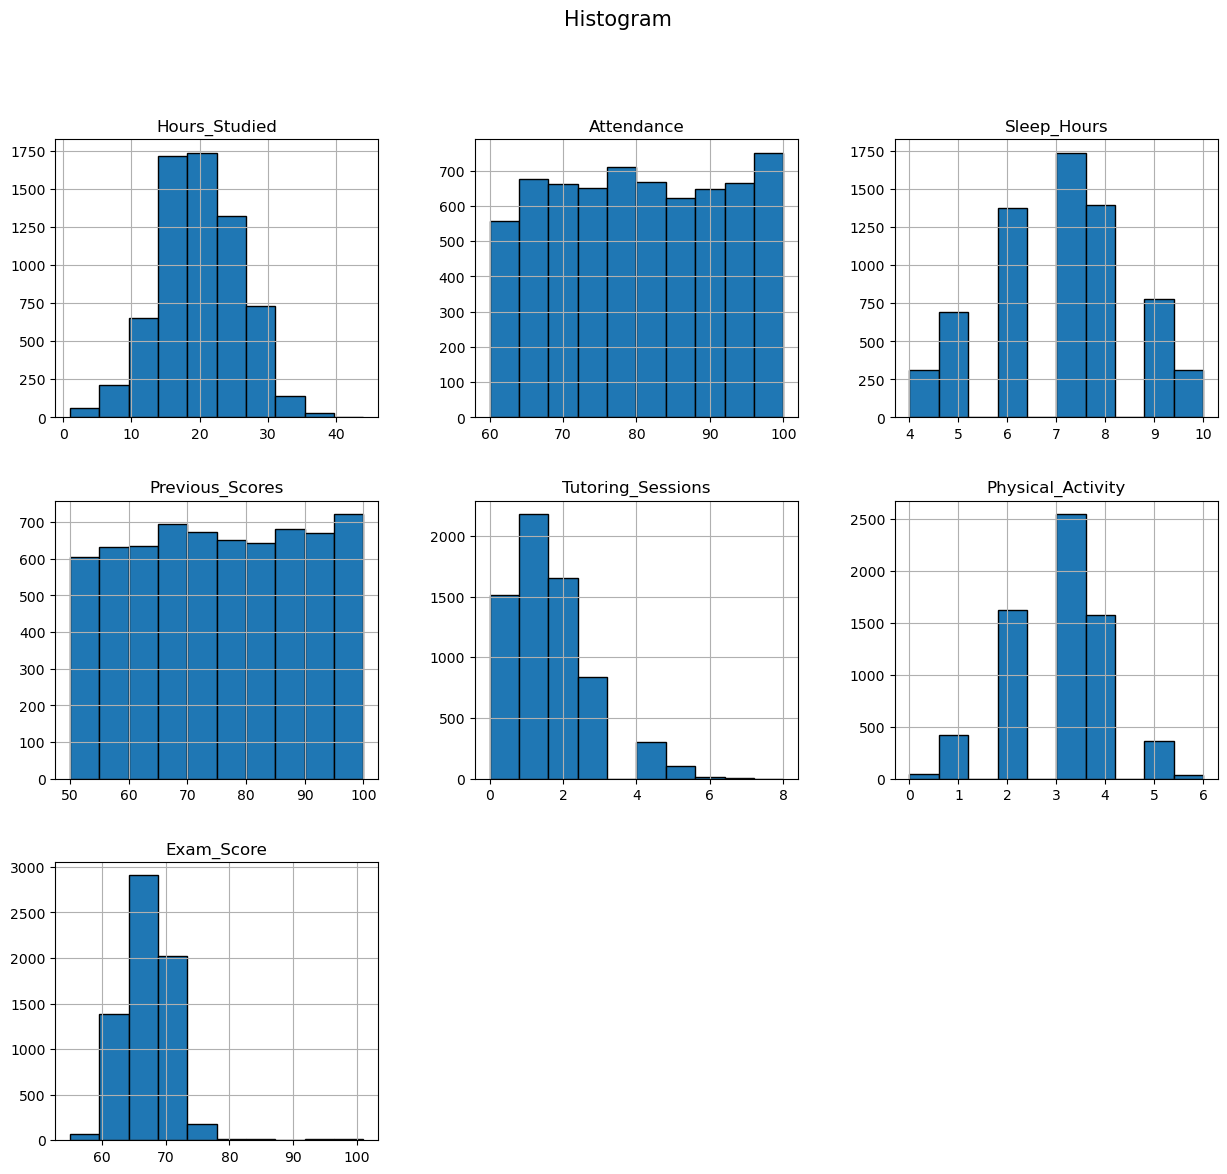

In [19]:

df.hist(edgecolor = 'k', figsize=(15,13))
plt.suptitle('Histogram', fontsize = 15)
plt.show()


In [20]:

df['Teacher_Quality'] = df['Teacher_Quality'].fillna('unknown')
df['Parental_Education_Level'] = df['Parental_Education_Level'].fillna('unknown')
df['Distance_from_Home'] = df['Distance_from_Home'].fillna('unknown')


In [23]:

df['Parental_Education_Level'].unique()


array(['High School', 'College', 'Postgraduate', 'unknown'], dtype=object)

In [25]:

df.isnull().sum()


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [27]:

df.duplicated().sum()


0

In [29]:

le = LabelEncoder()

df['Extracurricular_Activities'] = le.fit_transform(df['Extracurricular_Activities'])
df['Internet_Access']            = le.fit_transform(df['Internet_Access'])
df['School_Type']                = le.fit_transform(df['School_Type'])
df['Learning_Disabilities']      = le.fit_transform(df['Learning_Disabilities'])
df['Gender']                     = le.fit_transform(df['Gender'])
            

In [31]:

ordinal_mapping  = {'Low': 1, 'Medium': 2, 'High': 3}
ordinal_mapping1 = {'Negative': 1, 'Neutral': 2, 'Positive': 3}
ordinal_mapping2 = {'High School': 1, 'College': 2, 'Postgraduate': 3}
ordinal_mapping3 = {'Far': 1, 'Moderate': 2, 'Near': 3}

df['Parental_Involvement']       = df['Parental_Involvement'].map(ordinal_mapping)
df['Access_to_Resources']        = df['Access_to_Resources'].map(ordinal_mapping)
df['Motivation_Level']           = df['Motivation_Level'].map(ordinal_mapping)
df['Family_Income']              = df['Family_Income'].map(ordinal_mapping)
df['Teacher_Quality']            = df['Teacher_Quality'].map(ordinal_mapping)
df['Peer_Influence']             = df['Peer_Influence'].map(ordinal_mapping1)
df['Parental_Education_Level']   = df['Parental_Education_Level'].map(ordinal_mapping2)
df['Distance_from_Home']         = df['Distance_from_Home'].map(ordinal_mapping3)
            

In [33]:

df.head(20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2.0,1,3,3,0,1.0,3.0,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2.0,1,1,4,0,2.0,2.0,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2.0,1,2,4,0,3.0,3.0,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2.0,1,1,4,0,1.0,2.0,1,71
4,19,92,2,2,1,6,65,2,1,3,2,3.0,1,2,4,0,2.0,3.0,0,70
5,19,88,2,2,1,8,89,2,1,3,2,2.0,1,3,3,0,3.0,3.0,1,71
6,29,84,2,1,1,7,68,1,1,1,1,2.0,0,2,2,0,1.0,2.0,1,67
7,25,78,1,3,1,6,50,2,1,1,3,3.0,1,1,2,0,1.0,1.0,1,66
8,17,94,2,3,0,6,80,3,1,0,2,1.0,0,2,1,0,2.0,3.0,1,69
9,23,98,2,2,1,8,71,2,1,0,3,3.0,1,3,5,0,1.0,2.0,1,72


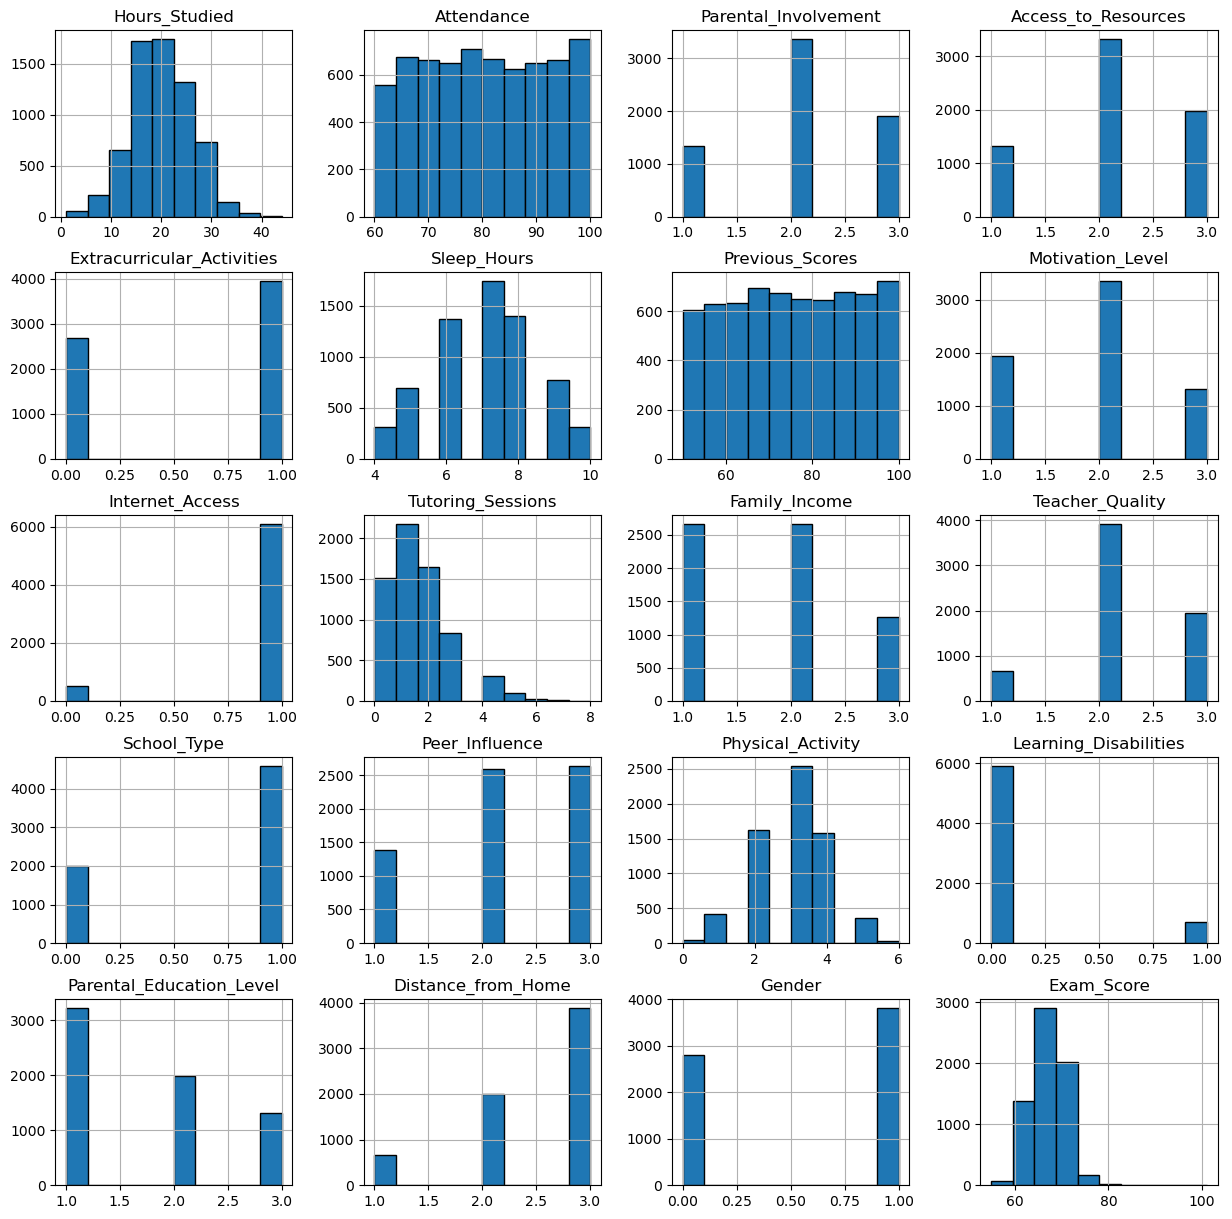

In [35]:

df.hist(edgecolor = 'k', figsize=(15,15))
plt.show()


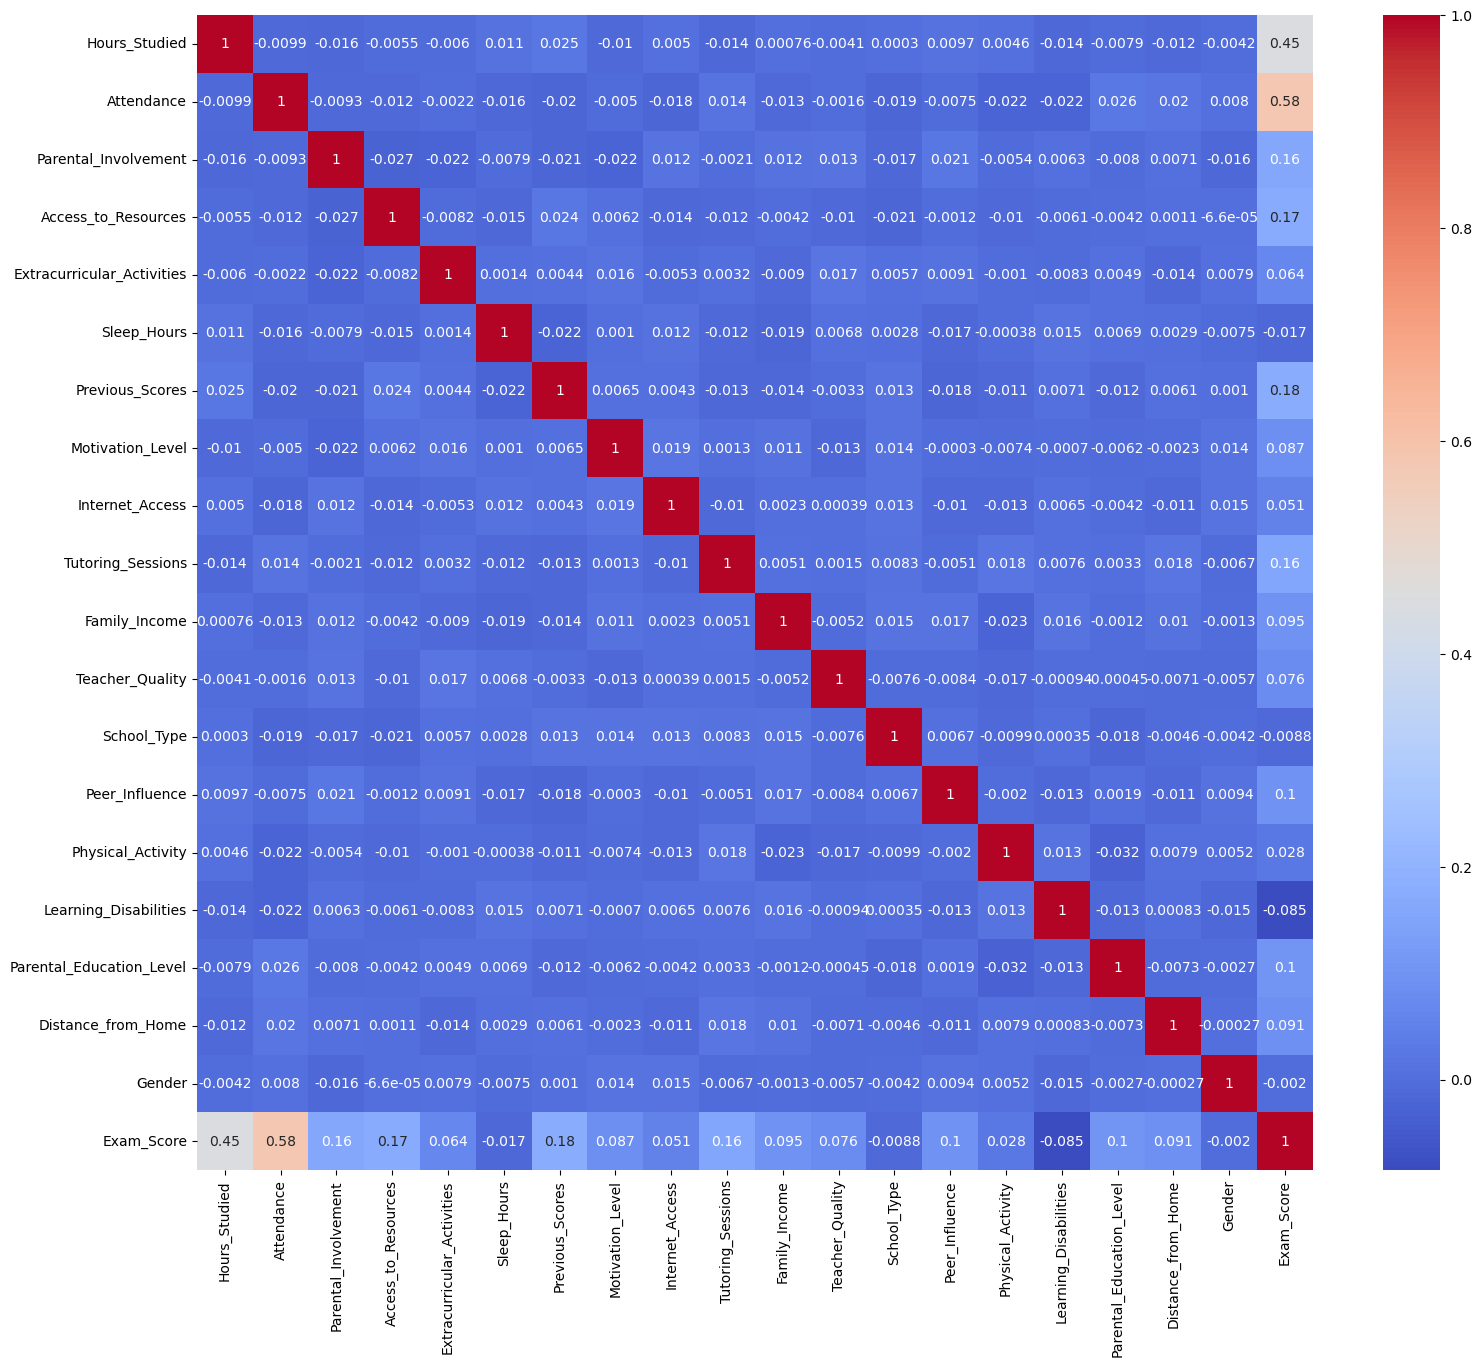

In [36]:

matrix=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(matrix,annot=True,cmap='coolwarm')
plt.show()


In [37]:

df.drop(columns=['Distance_from_Home'],inplace=True)
df.drop(columns=['Extracurricular_Activities'],inplace=True)
df.drop(columns=['Internet_Access'],inplace=True)
df.drop(columns=['Parental_Education_Level'],inplace=True)
df.drop(columns=['Physical_Activity'],inplace=True)
df.drop(columns=['Peer_Influence'],inplace=True)
df.drop(columns=['Gender'],inplace=True)
df.drop(columns=['School_Type'],inplace=True)
df.drop(columns=['Motivation_Level'],inplace=True)
df.drop(columns=['Sleep_Hours'],inplace=True)
df.drop(columns=['Family_Income'],inplace=True)
df.drop(columns=['Teacher_Quality'],inplace=True)
df.drop(columns=['Learning_Disabilities'],inplace=True)
df.drop(columns=['Access_to_Resources'],inplace=True)
df.drop(columns=['Parental_Involvement'],inplace=True)


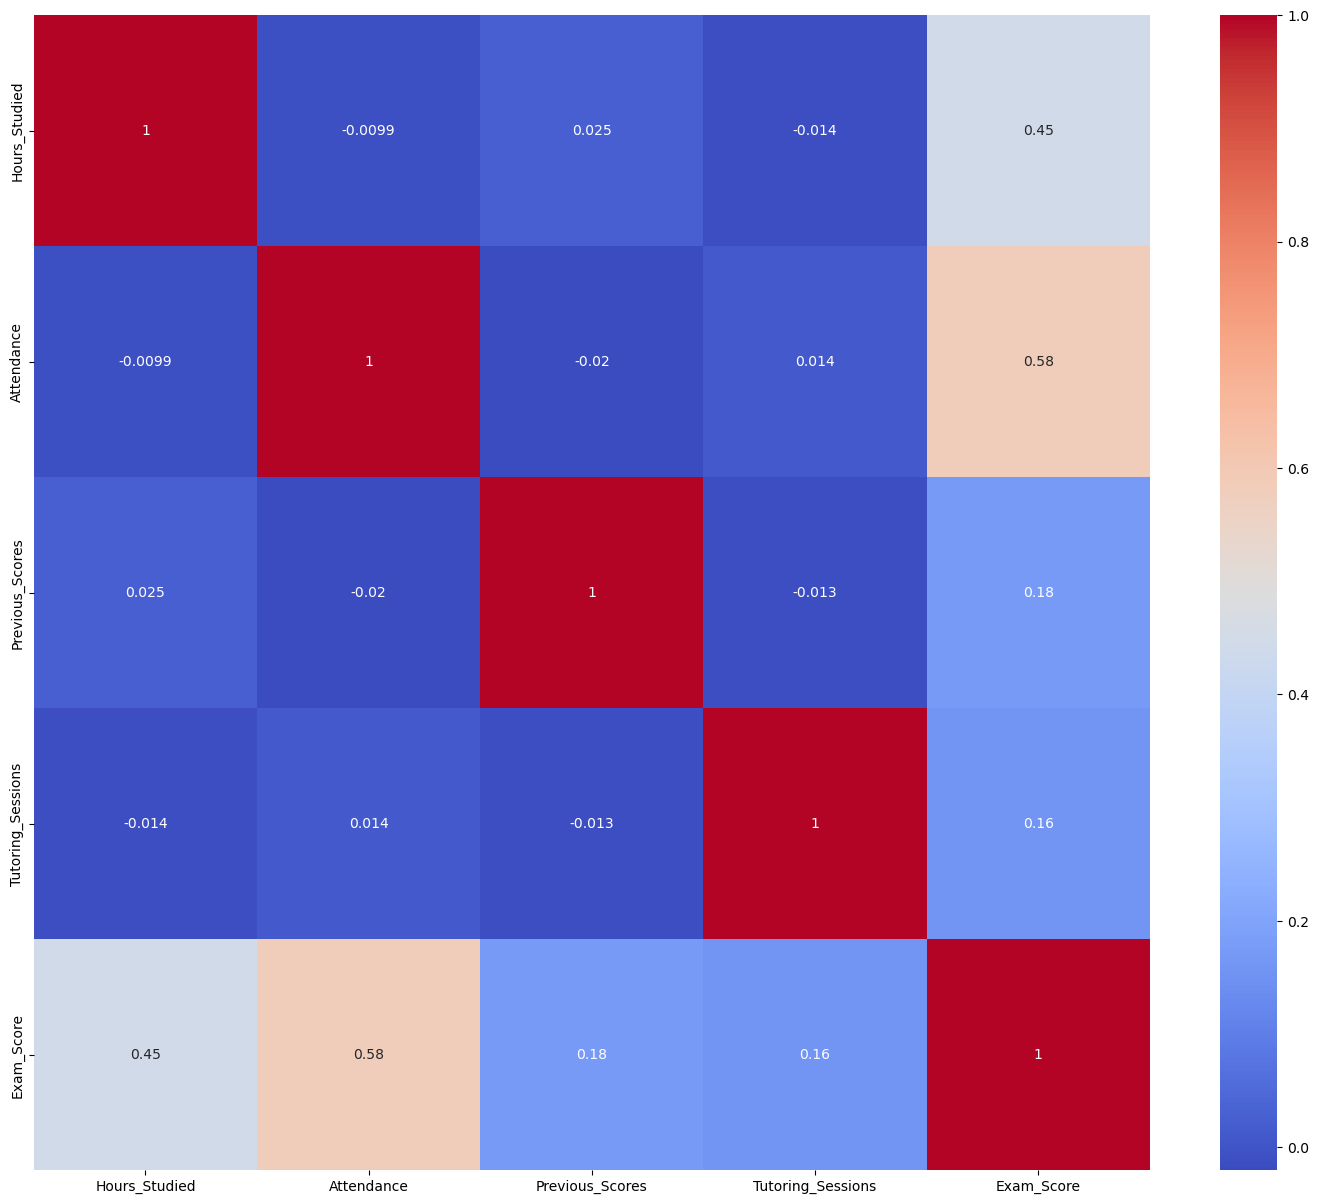

In [38]:

matrix=df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(matrix,annot=True,cmap='coolwarm')
plt.show()


In [40]:

df.columns


Index(['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions',
       'Exam_Score'],
      dtype='object')

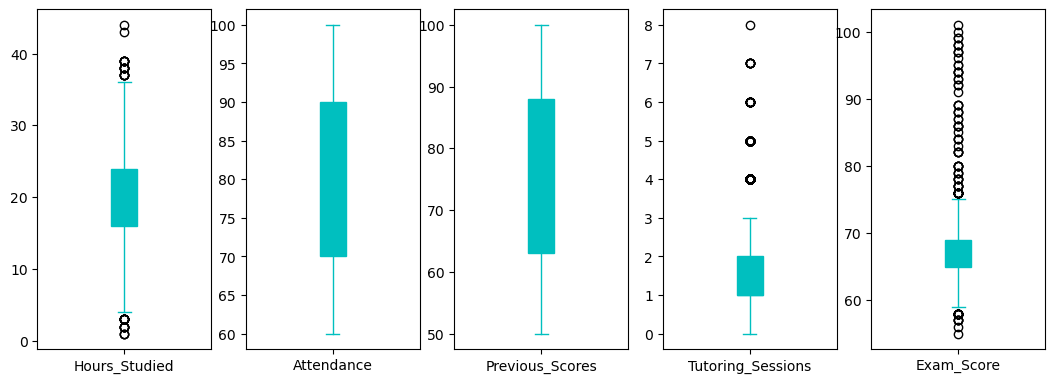

In [44]:

df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='c',patch_artist=True)
plt.show()


In [47]:

Q1=np.quantile(df, 0.25)
Q2=np.quantile(df, 0.50)
Q3=np.quantile(df, 0.75)
Q1, Q2, Q3


(16.0, 64.0, 73.0)

In [49]:

IQR = Q3 - Q1
IQR


57.0

In [57]:

def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 2  * IQR
    upper_bound = Q3 + 2 * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
for i in df.columns:
    df = remove_outliers_iqr(df, i)


In [61]:

# Define features and target variable
X = df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']] # Features
y = df['Exam_Score']    # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Model evalution
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

# Take user input for new data 'Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions' .
Hours_Studied     = float(input('Enter Hours_Studied'))
Attendance        = float(input('Enter Attendance'))
Previous_Scores   = float(input('Enter Previous_Scores'))
Tutoring_Sessions = float(input('Enter Tutoring_Sessions'))

user_input = [[Hours_Studied, Attendance, Previous_Scores, Tutoring_Sessions]]

# make a prediction using the trained model 
Exam_Score = model.predict(user_input)
print(f'the predicted :{Exam_Score}')


Mean Absolute Error: 1.14
Root Mean Squared Error: 1.43
R-squared: 0.80


Enter Hours_Studied 56
Enter Attendance 76
Enter Previous_Scores 56
Enter Tutoring_Sessions 78


the predicted :[114.38324901]


C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Predicted Exam_Score ')

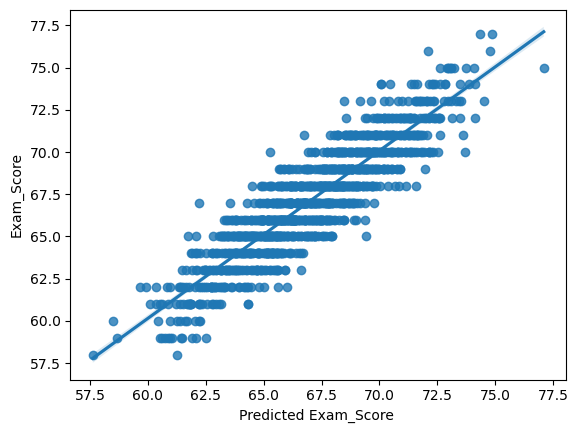

In [63]:

sns.regplot(x = y_pred, y = y_test)
plt.xlabel("Predicted Exam_Score ")
